In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

In [31]:
df=pd.read_excel(r"C:\Users\ideap\OneDrive\Desktop\2024\Machine End To End And EDA\Data\Concrete_Data.xls")

In [32]:
df

,Cement,Water,Day,Strength
0,540.0,162.0,28,79.986111
1,540.0,162.0,28,61.887366
2,332.5,228.0,270,40.269535
3,332.5,228.0,365,41.052780
4,198.6,192.0,360,44.296075
...,...,...,...,...
1025,276.4,179.6,28,44.284354
1026,322.2,196.0,28,31.178794
1027,148.5,192.7,28,23.696601
1028,159.1,175.6,28,32.768036


In [33]:
df.shape

(1030, 4)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cement    1030 non-null   float64
 1   Water     1030 non-null   float64
 2   Day       1030 non-null   int64  
 3   Strength  1030 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 32.3 KB


In [35]:
df.isnull().sum()

Cement      0
Water       0
Day         0
Strength    0
dtype: int64

In [36]:
df.duplicated().sum()

28

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.shape

(1002, 4)

In [39]:
df.describe()

,Cement,Water,Day,Strength
count,1002.000000,1002.000000,1002.000000,1002.000000
mean,278.231737,182.109531,45.935130,35.254442
std,104.161372,21.346235,63.810712,16.289568
min,102.000000,121.750000,1.000000,2.331808
25%,190.680000,166.610000,7.000000,23.523715
50%,263.250000,185.700000,28.000000,33.780187
75%,342.000000,192.940000,56.000000,44.867306
max,540.000000,247.000000,365.000000,82.599225


In [40]:
df.corr()

,Cement,Water,Day,Strength
Cement,1.000000,-0.053703,0.087927,0.489553
Water,-0.053703,1.000000,0.279419,-0.268470
Day,0.087927,0.279419,1.000000,0.337286
Strength,0.489553,-0.268470,0.337286,1.000000


<Axes: ylabel='count'>

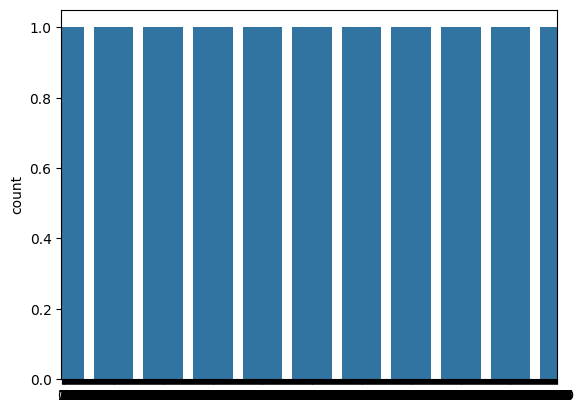

In [41]:
sns.countplot(df['Day'])

C:\Users\ideap\AppData\Local\Temp\ipykernel_17888\494290688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Strength'])


<Axes: xlabel='Strength', ylabel='Density'>

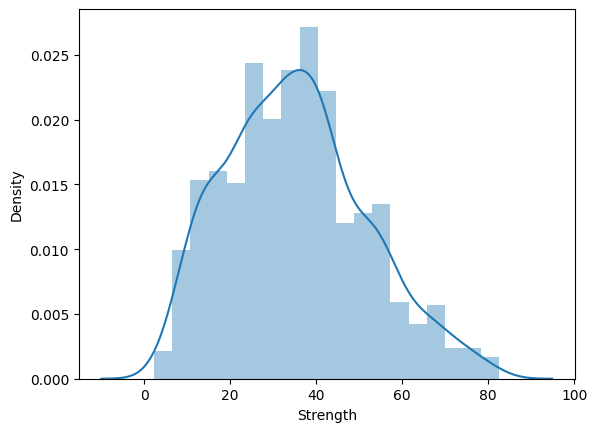

In [42]:
sns.distplot(df['Strength'])

In [43]:
# Train Test Split
x=df.drop(columns='Day')

In [44]:
x

,Cement,Water,Strength
0,540.0,162.0,79.986111
1,540.0,162.0,61.887366
2,332.5,228.0,40.269535
3,332.5,228.0,41.052780
4,198.6,192.0,44.296075
...,...,...,...
1025,276.4,179.6,44.284354
1026,322.2,196.0,31.178794
1027,148.5,192.7,23.696601
1028,159.1,175.6,32.768036


In [45]:
y=df['Day']

In [46]:
y

0        28
1        28
2       270
3       365
4       360
       ... 
1025     28
1026     28
1027     28
1028     28
1029     28
Name: Day, Length: 1002, dtype: int64

In [47]:
print(x.shape,y.shape)

(1002, 3) (1002,)


In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=3)

In [49]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from  sklearn.metrics import mean_squared_error,r2_score

In [50]:
models = {
    "lr":LinearRegression(),
    "lss":Lasso(),
    "Rid":Ridge(),
    "dtr":DecisionTreeRegressor(),
    "rfr":RandomForestClassifier()
}

for name, mod in models.items():
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    
    print(f"{name} ==== mse : {mean_squared_error(y_test,y_pred)}  r2_score  : {r2_score(y_test,y_pred)}")

lr ==== mse : 2809.54143980761  r2_score  : 0.35818469819485366
lss ==== mse : 2811.180442617065  r2_score  : 0.35781028226067113
Rid ==== mse : 2809.5445760765638  r2_score  : 0.35818398174149346
dtr ==== mse : 3827.064676616915  r2_score  : 0.12574036615067719


rfr ==== mse : 1948.9800995024875  r2_score  : 0.5547724503896014


In [51]:
rfr = RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

In [52]:
import pickle
pickle.dump(rfr,open('model.pkl','wb'))